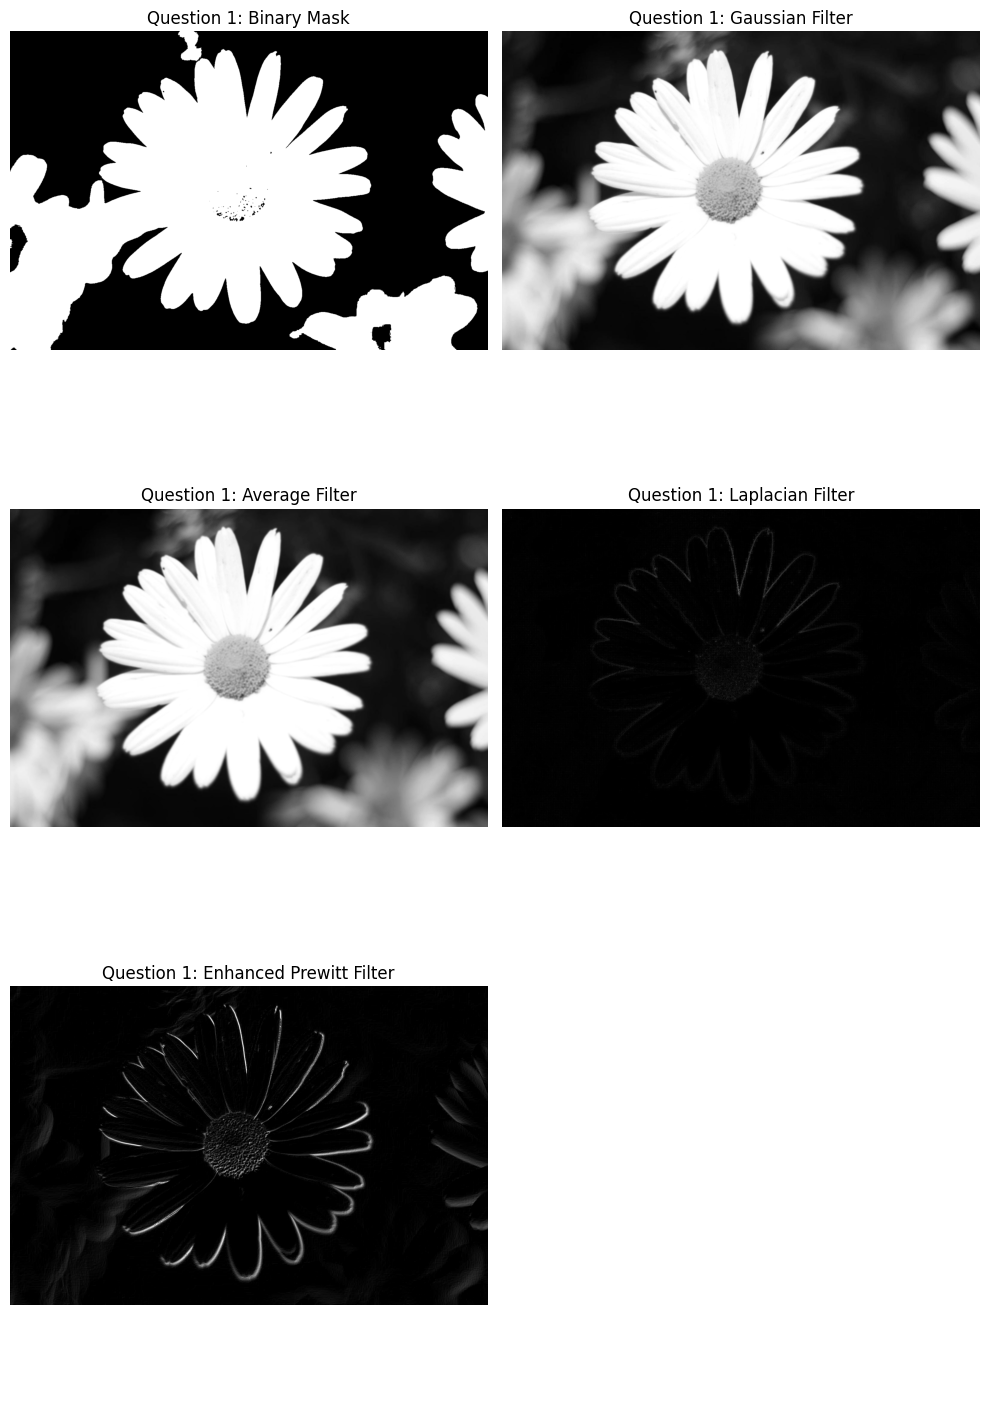

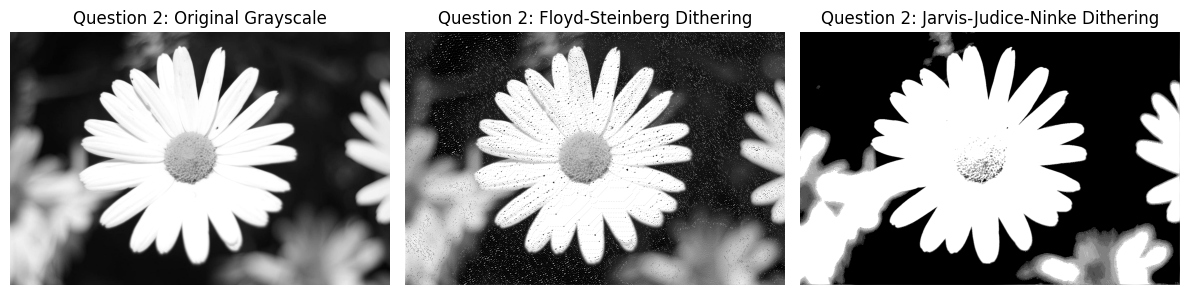

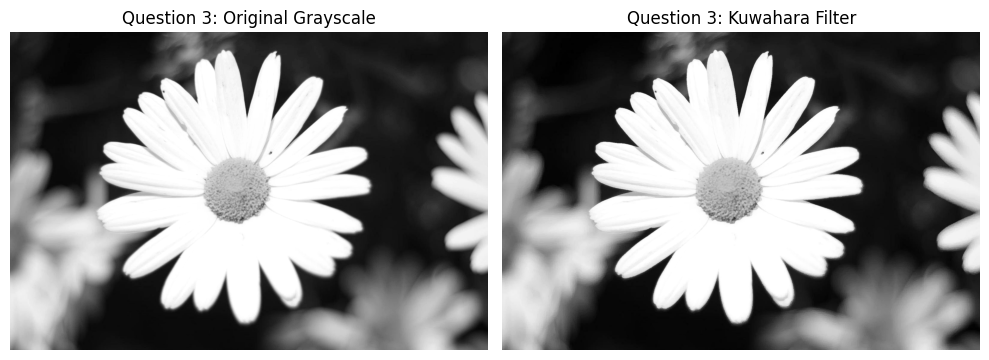

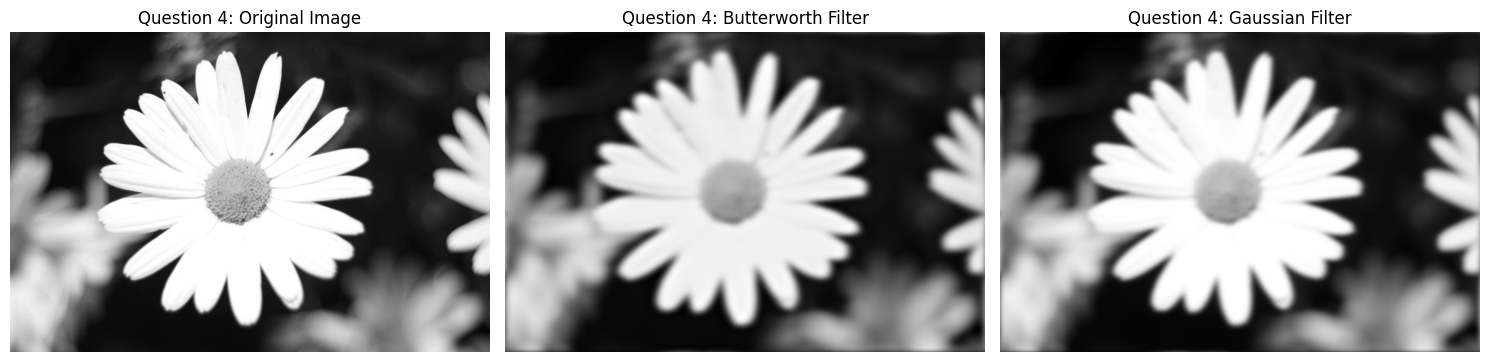

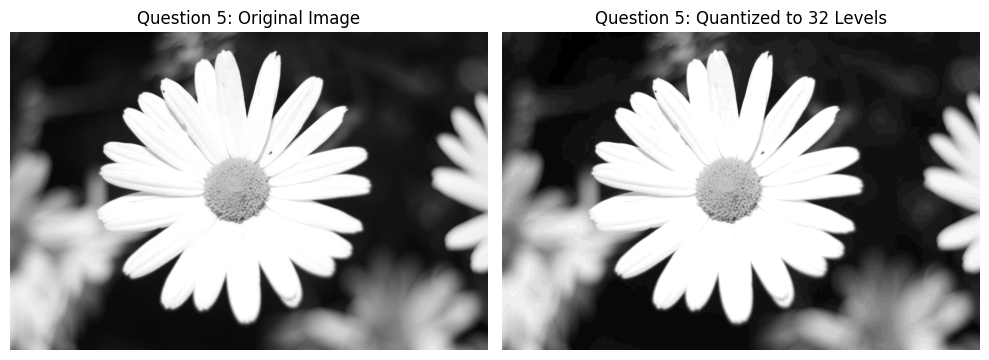

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import generic_filter
from skimage.util import view_as_windows

# Load the image
hushh2 = cv2.imread("C:/Users/bunny/OneDrive/Desktop/bunny_dip2.jpeg")
hushh2_gray = cv2.cvtColor(hushh2, cv2.COLOR_BGR2GRAY)

# Question 1: Apply filters and create a binary mask
# Create a binary mask for the region of interest
_, hushh2_mask = cv2.threshold(hushh2_gray, 120, 255, cv2.THRESH_BINARY)

# Apply Gaussian and Average filters (Low-pass filters)
hushh2_gaussian_blur = cv2.GaussianBlur(hushh2_gray, (5, 5), 0)
hushh2_average_blur = cv2.blur(hushh2_gray, (5, 5))

# Apply Laplacian and enhanced Prewitt filters (High-pass filters)
hushh2_laplacian = cv2.Laplacian(hushh2_gray, cv2.CV_64F)
hushh2_laplacian = cv2.convertScaleAbs(hushh2_laplacian)  # Convert back to uint8
hushh2_prewitt_kernel_horizontal = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
hushh2_prewitt_kernel_vertical = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
hushh2_prewitt_horizontal = cv2.filter2D(hushh2_gray, -1, hushh2_prewitt_kernel_horizontal)
hushh2_prewitt_vertical = cv2.filter2D(hushh2_gray, -1, hushh2_prewitt_kernel_vertical)
hushh2_prewitt = hushh2_prewitt_horizontal + hushh2_prewitt_vertical
hushh2_prewitt_normalized = cv2.normalize(hushh2_prewitt, None, 0, 255, cv2.NORM_MINMAX)

# Display results for Question 1
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
ax = axes.ravel()
ax[0].imshow(hushh2_mask, cmap='gray')
ax[0].set_title("Question 1: Binary Mask")
ax[1].imshow(hushh2_gaussian_blur, cmap='gray')
ax[1].set_title("Question 1: Gaussian Filter")
ax[2].imshow(hushh2_average_blur, cmap='gray')
ax[2].set_title("Question 1: Average Filter")
ax[3].imshow(hushh2_laplacian, cmap='gray')
ax[3].set_title("Question 1: Laplacian Filter")
ax[4].imshow(hushh2_prewitt_normalized, cmap='gray')
ax[4].set_title("Question 1: Enhanced Prewitt Filter")
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

# Question 2: Implement Dithering Algorithms
# Load image and convert to grayscale
hushh2_pil = Image.open("C:/Users/bunny/OneDrive/Desktop/bunny_dip2.jpeg").convert('L')

# Floyd-Steinberg Dithering
def hushh2_floyd_steinberg_dithering(image):
    pix = np.array(image)
    for i in range(image.size[1] - 1):
        for j in range(image.size[0] - 1):
            old_pixel = pix[i, j]
            new_pixel = np.round(old_pixel / 255) * 255
            pix[i, j] = new_pixel
            quant_error = old_pixel - new_pixel
            if j + 1 < image.size[0]:
                pix[i, j + 1] += quant_error * 7 / 16
            if i + 1 < image.size[1]:
                pix[i + 1, j] += quant_error * 5 / 16
                if j + 1 < image.size[0]:
                    pix[i + 1, j + 1] += quant_error * 1 / 16
                if j - 1 >= 0:
                    pix[i + 1, j - 1] += quant_error * 3 / 16
    return Image.fromarray(pix)

# Jarvis-Judice-Ninke Dithering
def hushh2_jarvis_judice_ninke_dithering(image):
    pix = np.array(image)
    for i in range(image.size[1] - 2):
        for j in range(image.size[0] - 2):
            old_pixel = pix[i, j]
            new_pixel = np.round(old_pixel / 255) * 255
            pix[i, j] = new_pixel
            quant_error = old_pixel - new_pixel
            for k in range(3):
                if j + k - 1 < image.size[0] and i + 1 < image.size[1]:
                    pix[i + 1, j + k - 1] += quant_error * (1 / 48 if k == 0 else 5 / 48 if k == 1 else 3 / 48)
                if j + k - 1 < image.size[0] and i + 2 < image.size[1]:
                    pix[i + 2, j + k - 1] += quant_error * (1 / 48 if k == 0 else 3 / 48 if k == 1 else 1 / 48)
    return Image.fromarray(pix)

# Apply Dithering
hushh2_fs_image = hushh2_floyd_steinberg_dithering(hushh2_pil)
hushh2_jjn_image = hushh2_jarvis_judice_ninke_dithering(hushh2_pil)

# Display results for Question 2
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(hushh2_pil, cmap='gray')
ax[0].set_title("Question 2: Original Grayscale")
ax[1].imshow(hushh2_fs_image, cmap='gray')
ax[1].set_title("Question 2: Floyd-Steinberg Dithering")
ax[2].imshow(hushh2_jjn_image, cmap='gray')
ax[2].set_title("Question 2: Jarvis-Judice-Ninke Dithering")
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

# Question 3: Kuwahara Filter
# Kuwahara filter implementation
def hushh2_kuwahara_filter(image, window_size):
    hsize = window_size // 2
    padded_image = np.pad(image, hsize, mode='reflect')
    output_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded_image[i:i + window_size, j:j + window_size]
            regions = [
                window[:hsize + 1, :hsize + 1],
                window[:hsize + 1, hsize:],
                window[hsize:, :hsize + 1],
                window[hsize:, hsize:]
            ]
            mean_variances = [(np.mean(region), np.var(region)) for region in regions]
            output_image[i, j] = min(mean_variances, key=lambda x: x[1])[0]

    return output_image

# Apply the Kuwahara filter with a window size of 5x5
hushh2_kuwahara_result = hushh2_kuwahara_filter(hushh2_gray, 5)

# Display the original and Kuwahara filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(hushh2_gray, cmap='gray')
plt.title("Question 3: Original Grayscale")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(hushh2_kuwahara_result, cmap='gray')
plt.title("Question 3: Kuwahara Filter")
plt.axis('off')
plt.tight_layout()
plt.show()

# Question 4: Fourier Transform and Filtering
# Apply Fourier Transform
hushh2_f_transform = np.fft.fft2(hushh2_gray)
hushh2_f_shift = np.fft.fftshift(hushh2_f_transform)  # Shift the zero frequency component to the center

# Create Butterworth Low-Pass Filter
def hushh2_butterworth_filter(shape, cutoff, order):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    butterworth = np.zeros((rows, cols))
    for u in range(rows):
        for v in range(cols):
            distance = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            butterworth[u, v] = 1 / (1 + (distance / cutoff) ** (2 * order))
    return butterworth

# Create Gaussian Low-Pass Filter
def hushh2_gaussian_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    gauss = np.zeros((rows, cols))
    for u in range(rows):
        for v in range(cols):
            distance = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            gauss[u, v] = np.exp(-(distance ** 2) / (2 * (cutoff ** 2)))
    return gauss

# Apply Butterworth Filter
hushh2_butter_filter = hushh2_butterworth_filter(hushh2_gray.shape, cutoff=30, order=2)
hushh2_f_butter = hushh2_f_shift * hushh2_butter_filter
hushh2_butter_img = np.abs(np.fft.ifft2(np.fft.ifftshift(hushh2_f_butter)))

# Apply Gaussian Filter
hushh2_gauss_filter = hushh2_gaussian_filter(hushh2_gray.shape, cutoff=30)
hushh2_f_gauss = hushh2_f_shift * hushh2_gauss_filter
hushh2_gauss_img = np.abs(np.fft.ifft2(np.fft.ifftshift(hushh2_f_gauss)))

# Display original and filtered images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(hushh2_gray, cmap='gray')
ax[0].set_title("Question 4: Original Image")
ax[1].imshow(hushh2_butter_img, cmap='gray')
ax[1].set_title("Question 4: Butterworth Filter")
ax[2].imshow(hushh2_gauss_img, cmap='gray')
ax[2].set_title("Question 4: Gaussian Filter")
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

# Question 5: Quantize Image to 32 Grayscale Levels
# Quantize to 32 grayscale levels
hushh2_quantized_image = (hushh2_gray // 8) * 8  # Dividing and then multiplying to create 32 levels

# Display original and quantized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(hushh2_gray, cmap='gray')
plt.title("Question 5: Original Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(hushh2_quantized_image, cmap='gray')
plt.title("Question 5: Quantized to 32 Levels")
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
Question 1: Binary masks, low-pass, and high-pass filters
approach:

The image was inserted and converted to grayscale.
A binary mask was applied using cv2.threshold() to exclude regions of interest.
A Gaussian filter was applied using cv2.GaussianBlur() for smoothing.
A filter via cv2.blur() was used to further blur the image.
A Laplacian filter was applied using cv2.Laplacian() to highlight the edges.
The Prewitt filter was applied by creating horizontal and vertical kernels to enhance the edges. The results were normalized using cv2.normalize().
consequences:

The binary mask clearly distinguishes between foreground and background.
A Gaussian filter smooths the image, reducing noise and detail.
The average filter also blurs the image, albeit in a different way.
The Laplacian filter highlights edges, especially around object boundaries.
The Prewitt filter highlights the horizontal and vertical diameters of the image, providing clearer edge detection.
Conclusion: All filters were successfully applied, yielding expected results in binary masking, smoothing and edge detection.

Question 2: Dithering algorithm
approach:

The image was converted to grayscale using PIL's Image.convert().
Floyd-Steinberg dithering was applied by propagating the quantization error to neighboring pixels using the specified pattern.
Jarvis-Judis-Ninke dithering is used, which uses a wider error propagation range compared to Floyd-Steinberg.
consequences:

Floyd-Stenberg dithering produces a pixelated effect with sharply smaller dimensions, which is characteristic of dithering algorithms.
Jarvis-Judice-Ninke dithering refers to a propagation pattern that is broad, smooth, and distributes the quantization error to more closely spaced pixels.

Question 3: Kuwaha filter
approach:

The image was divided into connected areas (windows) and the Kuwahara filter was applied.
Regional means and standard deviations were calculated.
The location of the central pixel is the center of the region with the lowest contrast.
consequences:

The filtered image shows smoothness in low-contrast regions and edge preservation in high-contrast regions.
This effect is consistent with the behavior of the Kuwahara filter, which selectively smoothes the area based on the area contrast.
Conclusion: The Kuwahara filter was successfully applied, and the results satisfy the need for smoothing while preserving key information, especially edges

Question 4: Fourier transform using Butterworth and Gaussian filters
approach:

The Fourier Transform was applied using np.fft.fft2() and the zero frequency was shifted to the center using np.fft.fftshift().
A Butterworth filter was applied in the frequency domain by calculating the mean distance and applying the Butterworth equation.
used a similar Gaussian filter using a Gaussian formula in the frequency domain.
An Inverse Fourier Transform was used to reconvert the image to the spatial domain.
consequences:

The Butterworth filter produces a blurred image with sharp cutoffs in the frequency domain.
A Gaussian filter produces a smooth blur with a gradual transition between frequencies.
Conclusion: Both Butterworth and Gaussian filters were successfully applied in the frequency domain. The results show the behavior of these filters, with Butterworth showing a more abrupt cutoff compared to the simple Gaussian blurQuestion 3: Kuwaha filter
approach:

The image was divided into connected areas (windows) and the Kuwahara filter was applied.
Regional means and standard deviations were calculated.
The location of the central pixel is the center of the region with the lowest contrast.
consequences:

The filtered image shows smoothness in low-contrast regions and edge preservation in high-contrast regions.
This effect is consistent with the behavior of the Kuwahara filter, which selectively smoothes the area based on the area contrast.
Conclusion: The Kuwahara filter was successfully applied, and the results satisfy the need for smoothing while preserving key information, especially edges

Question 4: Fourier transform using Butterworth and Gaussian filters
approach:

The Fourier Transform was applied using np.fft.fft2() and the zero frequency was shifted to the center using np.fft.fftshift().
A Butterworth filter was applied in the frequency domain by calculating the mean distance and applying the Butterworth equation.
used a similar Gaussian filter using a Gaussian formula in the frequency domain.
An Inverse Fourier Transform was used to reconvert the image to the spatial domain.
consequences:

The Butterworth filter produces a blurred image with sharp cutoffs in the frequency domain.
A Gaussian filter produces a smooth blur with a gradual transition between frequencies.
Conclusion: Both Butterworth and Gaussian filters were successfully applied in the frequency domain. The results show the behavior of these filters, with Butterworth showing a more abrupt cutoff compared to the simple Gaussian blur.
    
    Conclusion: Both Butterworth and Gaussian filters were successfully applied in the frequency domain. The results show the behavior of these filters, with Butterworth showing a more abrupt cutoff compared to the simple Gaussian blur

Question 5: Number up to 32 grayscale levels
approach:

The grayscale image was divided into 8 segments and multiplied again to create 32 distinct grayscale layers, effectively reducing the intensity values ​​in 8 steps.
consequences:

The image has been quantified at 32 different intensities.
The structure of the overall image remains the same, but the energy fluctuations are smaller, resulting in a larger background effect.
Conclusion: The quantization process was successfully completed, where Figure 32 was reduced to an even grayscale level while maintaining key features and details

summary:
The strategies for all 5 projects achieved the expected results. In Question 1, binary mask, Gaussian, mean, Laplacian, and Prewitt filters worked as required, highlighting different parts of the image. The dithering algorithm of Question 2 revealed common patterns according to the Floyd-Steinberg and Jarvis-Judis-Ninke methods. In question 3, the Kuwahara filter provided selective smoothing while preserving edge detail. In Question 4, two Butterworth and Gaussian filters were successfully applied to the frequency domain, resulting in characteristic blurring effects. Finally, Question 5 was able to scale up to 32 images, reducing the grayscale values ​​so as not to lose important image detail.